In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn import metrics
import seaborn as sns
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("paper")
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

In [3]:
atlas = pd.read_csv('/Users/rishigummakonda/Documents/Springboard/capstone/data/atlas_data/atlas.csv')

In [4]:
atlas.fillna(0,inplace=True)

In [5]:
atlas.describe().round(2)

,tract,county,state,cz,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,...,kfr_pooled_p100,kfr_white_p25,kfr_white_p75,kfr_white_p100,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam
count,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,...,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00,73278.00
mean,255250.35,86.06,28.19,21058.90,79267.05,26.60,0.27,0.23,0.12,58484.36,...,68453.31,35662.55,51151.70,69068.67,986.21,600.75,144.71,33.03,168.39,9.24
std,345989.96,99.55,16.31,11673.14,35399.31,7.61,0.18,0.17,0.14,29944.61,...,20152.72,13099.50,17339.66,30723.50,511.52,443.86,281.32,79.52,327.48,65.93
min,100.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10300.00,29.00,13.00,11402.00,56821.94,21.86,0.13,0.11,0.02,38464.00,...,59462.81,31288.31,48253.86,61498.64,627.00,241.00,6.00,2.00,15.00,0.00
50%,44804.50,63.00,28.00,19700.00,71296.57,26.06,0.22,0.18,0.07,52166.00,...,70020.82,36545.18,54303.33,72910.21,933.00,547.00,26.00,8.00,41.00,2.00
75%,458875.75,109.00,42.00,32000.00,94309.13,30.98,0.37,0.32,0.17,71719.00,...,79049.73,42617.66,59992.14,82458.94,1295.00,881.00,132.00,28.00,146.00,5.00
max,989200.00,840.00,72.00,39400.00,330042.22,80.03,1.00,1.00,1.00,250001.00,...,980579.00,244492.17,849669.19,1047302.60,8441.00,4202.00,3041.00,1816.00,3966.00,3605.00


In [6]:
nyc_atlas=atlas[atlas['czname']=='New York']
la_atlas=atlas[atlas['czname']=='Los Angeles']

In [7]:
nyc_atlas.reset_index(drop=True, inplace=True)
la_atlas.reset_index(drop=True,inplace=True)

How does average upward mobility, pooling races and genders, for children with parents at the 25th percentile (kfr pooledp25) in each city compare to mean (population-weighted, using count_pooled) upward mobility in the state and in the U.S. overall? 

In [8]:
def avg_std (col_name, col_val,val):
    if(col_name !=0):
        place = atlas[atlas[col_name]==col_val]
    else:
        place=atlas
    cleaned_place = place[place[val]!=0]
    values=cleaned_place[val]
    weights=cleaned_place['count_pooled']
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return [average, math.sqrt(variance)]

In [9]:
col = ['Avg Income', 'Avg Income STD', 
       'p25', 'p25 std', 
       'p75', 'p75 std',
       'p100', 'p100 std']
places=['NYC', 'New York State', 'LA', 'California', 'USA']

In [10]:
nyc_hhinc_2000 = avg_std('czname','New York','hhinc_mean2000')
nyc_p25 = avg_std('czname','New York','kfr_pooled_p25')
nyc_p75=avg_std('czname','New York','kfr_pooled_p75')
nyc_p100=avg_std('czname','New York','kfr_pooled_p100')
nyc_data = [nyc_hhinc_2000[0], nyc_hhinc_2000[1], 
            nyc_p25[0], nyc_p25[1], 
            nyc_p75[0], nyc_p75[1], 
            nyc_p100[0], nyc_p100[1]]

In [11]:
nys_hhinc_2000 = avg_std('state',36,'hhinc_mean2000')
nys_p25 = avg_std('state',36,'kfr_pooled_p25')
nys_p75=avg_std('state',36,'kfr_pooled_p75')
nys_p100=avg_std('state',36,'kfr_pooled_p100')
nys_data = [nys_hhinc_2000[0], nys_hhinc_2000[1], 
            nys_p25[0], nys_p25[1], 
            nys_p75[0], nys_p75[1], 
            nys_p100[0], nys_p100[1]]

In [12]:
la_hhinc_2000 = avg_std('czname','Los Angeles','hhinc_mean2000')
la_p25 = avg_std('czname','Los Angeles','kfr_pooled_p25')
la_p75=avg_std('czname','Los Angeles','kfr_pooled_p75')
la_p100=avg_std('czname','Los Angeles','kfr_pooled_p100')
la_data = [la_hhinc_2000[0], la_hhinc_2000[1], 
            la_p25[0], la_p25[1], 
            la_p75[0], la_p75[1], 
            la_p100[0], la_p100[1]]

In [13]:
ca_hhinc_2000 = avg_std('state',4,'hhinc_mean2000')
ca_p25 = avg_std('state',4,'kfr_pooled_p25')
ca_p75=avg_std('state',4,'kfr_pooled_p75')
ca_p100=avg_std('state',4,'kfr_pooled_p100')
ca_data = [ca_hhinc_2000[0], ca_hhinc_2000[1], 
            ca_p25[0], ca_p25[1], 
            ca_p75[0], ca_p75[1], 
            ca_p100[0], ca_p100[1]]

In [14]:
usa_hhinc_2000 = avg_std(0,0,'hhinc_mean2000')
usa_p25 = avg_std(0,0,'kfr_pooled_p25')
usa_p75=avg_std(0,0,'kfr_pooled_p75')
usa_p100=avg_std(0,0,'kfr_pooled_p100')
usa_data = [usa_hhinc_2000[0], usa_hhinc_2000[1], 
            usa_p25[0], usa_p25[1], 
            usa_p75[0], usa_p75[1], 
            usa_p100[0], usa_p100[1]]

In [15]:
df = pd.DataFrame(list(zip(nyc_data,nys_data,la_data, ca_data,usa_data)), index=col, columns=places)
df['NYC-NYS%'] = 100*(df['NYC'] - df['New York State'])/(df['NYC'])
df['LA-CA%'] = 100* (df['LA'] - df['California'])/(df['LA'])
df['CA-USA%'] = 100*(df['California'] - df['USA'])/df['California']
df['NYS-USA%']=100*(df['New York State'] - df['USA'])/df['New York State']
df['LA-USA%'] = 100*(df['LA'] - df['USA'])/df['LA']
df['NYC-USA%']=100*(df['NYC'] - df['USA'])/df['NYC']
df['NYC-LA%']=100*(df['NYC'] - df['LA'])/df['NYC']
df1 = df.drop(['Avg Income STD','p25 std', 'p75 std', 'p100 std'])
df2 = df.drop(['Avg Income','p25', 'p75', 'p100'])
df1.round(2)

,NYC,New York State,LA,California,USA,NYC-NYS%,LA-CA%,CA-USA%,NYS-USA%,LA-USA%,NYC-USA%,NYC-LA%
Avg Income,87536.51,83402.26,83631.40,75638.41,80799.64,4.72,9.56,-6.82,3.12,3.39,7.70,4.46
p25,38161.25,37049.44,35463.51,32130.48,34311.89,2.91,9.40,-6.79,7.39,3.25,10.09,7.07
p75,51219.62,52318.26,47368.41,46390.99,51284.03,-2.14,2.06,-10.55,1.98,-8.27,-0.13,7.52
p100,64358.56,68151.43,59028.40,61026.89,69221.74,-5.89,-3.39,-13.43,-1.57,-17.27,-7.56,8.28


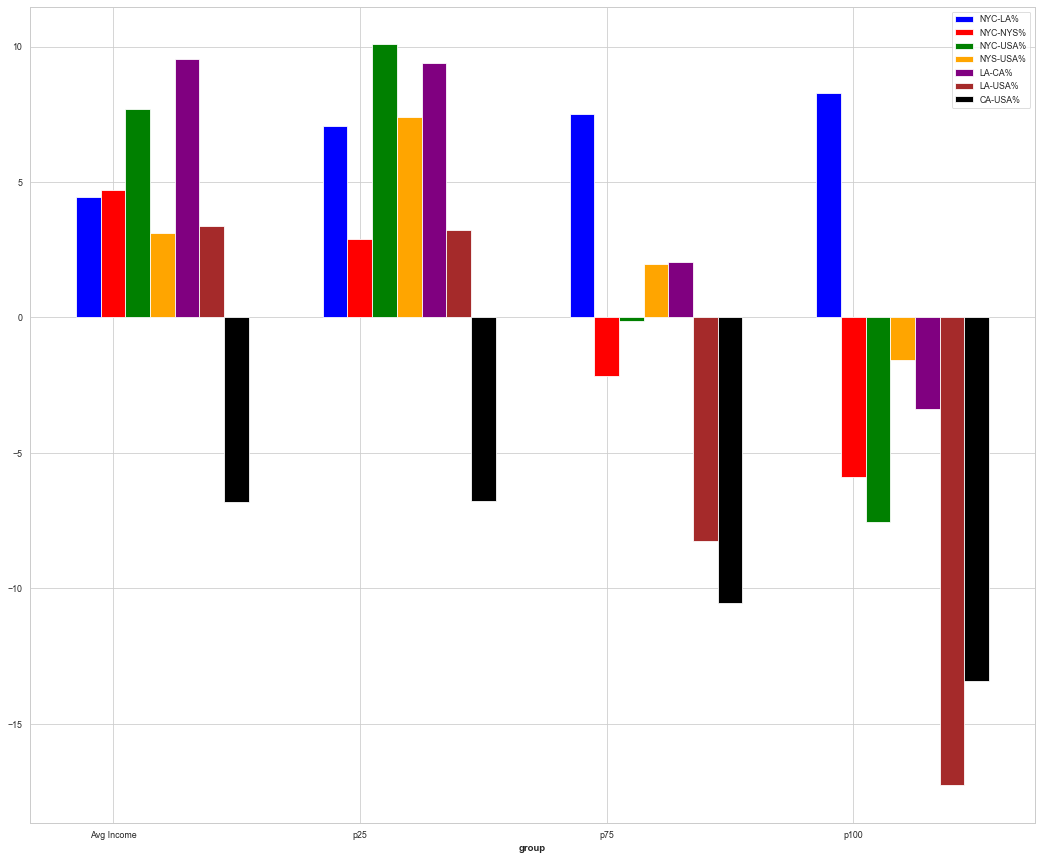

In [16]:
#barplot comparing incomes
plt.figure(figsize=(18,15))
# set width of bar
barWidth = 0.10
bars1=df1['NYC-LA%']
bars2=df1['NYC-NYS%']
bars3=df1['NYC-USA%']
bars4=df1['NYS-USA%']
bars5=df1['LA-CA%']
bars6=df1['LA-USA%']
bars7=df1['CA-USA%']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='NYC-LA%')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='NYC-NYS%')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='NYC-USA%')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='NYS-USA%')
plt.bar(r5, bars5, color='purple', width=barWidth, edgecolor='white', label='LA-CA%')
plt.bar(r6, bars6, color='brown', width=barWidth, edgecolor='white', label='LA-USA%')
plt.bar(r7, bars7, color='black', width=barWidth, edgecolor='white', label='CA-USA%')


 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],df1.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()


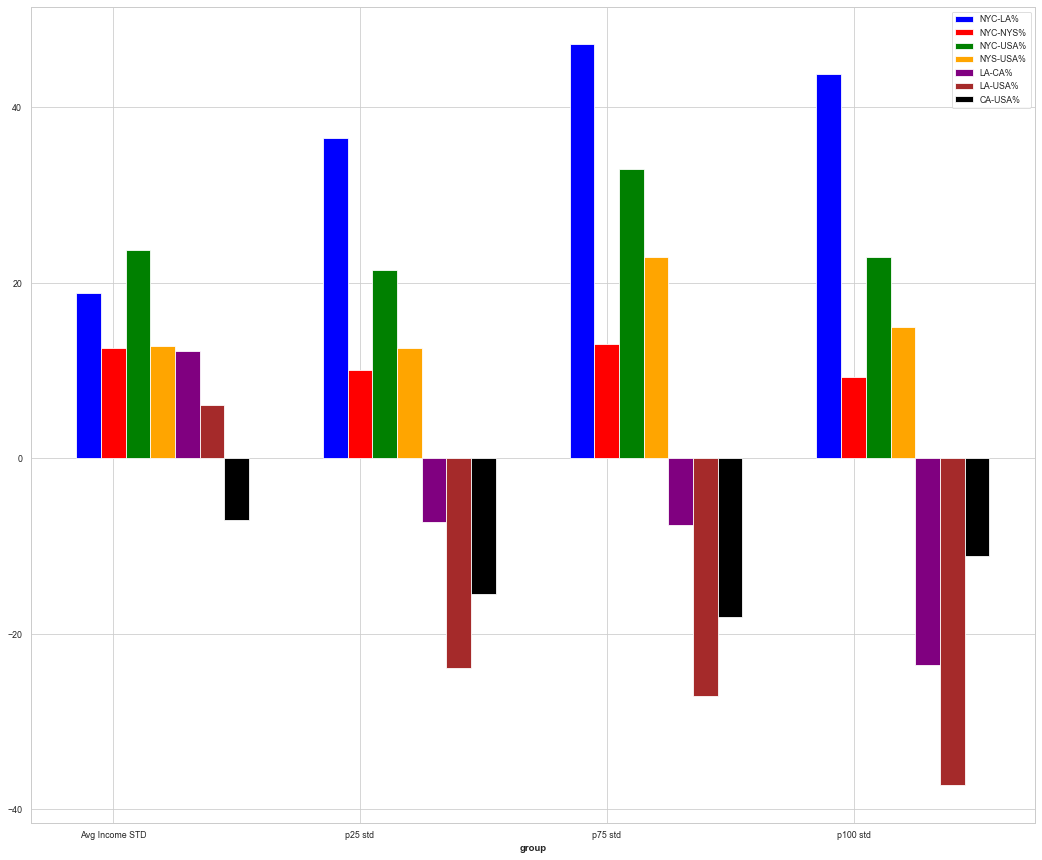

In [17]:
#barplot comparing STDs
plt.figure(figsize=(18,15))
# set width of bar
barWidth = 0.10
bars1=df2['NYC-LA%']
bars2=df2['NYC-NYS%']
bars3=df2['NYC-USA%']
bars4=df2['NYS-USA%']
bars5=df2['LA-CA%']
bars6=df2['LA-USA%']
bars7=df2['CA-USA%']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]


# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='NYC-LA%')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='NYC-NYS%')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='NYC-USA%')
plt.bar(r4, bars4, color='orange', width=barWidth, edgecolor='white', label='NYS-USA%')
plt.bar(r5, bars5, color='purple', width=barWidth, edgecolor='white', label='LA-CA%')
plt.bar(r6, bars6, color='brown', width=barWidth, edgecolor='white', label='LA-USA%')
plt.bar(r7, bars7, color='black', width=barWidth, edgecolor='white', label='CA-USA%')


 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],df2.index)
 
# Create legend & Show graphic
plt.legend()
plt.show()
